# <center>MDS6212 Fintech Theory and Practice: Week 4 Assignment<center>

----
    
**220041006 *Yihang Li***

**Data confidential requirements:** 
*     Do not share datasets with others
*     Do not post datasets on the Web site
*     Datasets can only be used to work on assignments of MDS6212, M.Sc. in Data Science, CUHK-Shenzhen.

**Datasets:** 
*     MDS6212 Week 4 Tesla.xlsx

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Present-word-cloud" data-toc-modified-id="Present-word-cloud-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Present word cloud</a></span></li><li><span><a href="#Calculate-the-news-sentiment-variable-using-Loughran-and-McDonald-Sentiment-Word-Lists" data-toc-modified-id="Calculate-the-news-sentiment-variable-using-Loughran-and-McDonald-Sentiment-Word-Lists-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Calculate the news sentiment variable using Loughran and McDonald Sentiment Word Lists</a></span></li><li><span><a href="#Calculate-the-Fog-index" data-toc-modified-id="Calculate-the-Fog-index-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Calculate the Fog index</a></span></li><li><span><a href="#Question-4:-using-the-data-set-of-Tesla" data-toc-modified-id="Question-4:-using-the-data-set-of-Tesla-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Question 4: using the data set of Tesla</a></span><ul class="toc-item"><li><span><a href="#report-the-summary-statistics-of-sentiment,-novelty,-and-impact" data-toc-modified-id="report-the-summary-statistics-of-sentiment,-novelty,-and-impact-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>report the summary statistics of sentiment, novelty, and impact</a></span></li><li><span><a href="#present-the-correlation-coefficient-among-sentiment,-novelty,-and-impact" data-toc-modified-id="present-the-correlation-coefficient-among-sentiment,-novelty,-and-impact-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>present the correlation coefficient among sentiment, novelty, and impact</a></span></li><li><span><a href="#show-the-frequency-and-fraction-of-top-10-news-categories." data-toc-modified-id="show-the-frequency-and-fraction-of-top-10-news-categories.-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>show the frequency and fraction of top 10 news categories.</a></span></li></ul></li></ul></div>

In [1]:
!ls 

 DS_Store
 LoughranMcDonald_SentimentWordLists_2018.xlsx
'MDS6212 Week 4 Assignment.docx'
'MDS6212 Week 4 Tesla.xlsx'
 Tesla3.png
 Week4Assignment.ipynb
'_$MDS6212 Week 4 Assignment.xlsx'


**Questions 1-3:**
For the following news article, 

    “Tesla‘s third-quarter sales jumped 44% as global demand for its electric vehicles outpaced that of most other automakers. The company reported Friday that it had delivered 139,000 SUVs and sedans from July through September, compared with 97,000 deliveries during the same period a year ago. The sales topped even some of the most optimistic projections coming from Wall Street. Analysts polled by data provider FactSet expected the company to sell closer to 137,000. Telsa has been rewriting the script throughout the year amidst a pandemic that has closed factories and scrambled supply lines. “This puts Musk & Co. in prime position to hit the area code of 500k units for the year which six months ago was not even on the map for the bulls,'" Daniel Ives of Wedbush wrote Friday. China was likely a major source of strength in the quarter, Ives said. Tesla could post its fifth consecutive quarter of profits later this month.”

In [2]:
news_article = """“Tesla‘s third-quarter sales jumped 44% as global demand for its electric vehicles outpaced that of most other automakers. The company reported Friday that it had delivered 139,000 SUVs and sedans from July through September, compared with 97,000 deliveries during the same period a year ago. The sales topped even some of the most optimistic projections coming from Wall Street. Analysts polled by data provider FactSet expected the company to sell closer to 137,000. Telsa has been rewriting the script throughout the year amidst a pandemic that has closed factories and scrambled supply lines. “This puts Musk & Co. in prime position to hit the area code of 500k units for the year which six months ago was not even on the map for the bulls,'" Daniel Ives of Wedbush wrote Friday. China was likely a major source of strength in the quarter, Ives said. Tesla could post its fifth consecutive quarter of profits later this month.”"""

## Present word cloud



In [3]:
news_article

'“Tesla‘s third-quarter sales jumped 44% as global demand for its electric vehicles outpaced that of most other automakers. The company reported Friday that it had delivered 139,000 SUVs and sedans from July through September, compared with 97,000 deliveries during the same period a year ago. The sales topped even some of the most optimistic projections coming from Wall Street. Analysts polled by data provider FactSet expected the company to sell closer to 137,000. Telsa has been rewriting the script throughout the year amidst a pandemic that has closed factories and scrambled supply lines. “This puts Musk & Co. in prime position to hit the area code of 500k units for the year which six months ago was not even on the map for the bulls,\'" Daniel Ives of Wedbush wrote Friday. China was likely a major source of strength in the quarter, Ives said. Tesla could post its fifth consecutive quarter of profits later this month.”'

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
bg_img = np.array(Image.open('Tesla3.png'))

In [6]:
wordcloud = WordCloud(
    mask=bg_img,
    width=3000,
    height=2000,
    background_color='white',
    random_state=7,
    stopwords=STOPWORDS).generate(news_article)
# create coloring from image
image_colors = ImageColorGenerator(bg_img)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')

<Figure size 2880x2160 with 0 Axes>

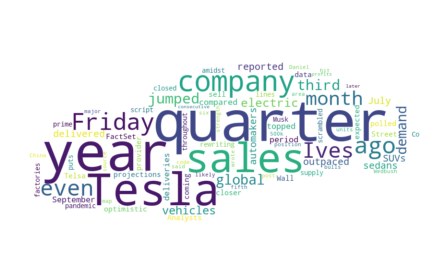

In [7]:
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
# plt.savefig('wordcloud.png', bbox_inches = "tight")

## Calculate the news sentiment variable using Loughran and McDonald Sentiment Word Lists

In [8]:
#use pysentiment2 to get Loughran and McDonald Sentiment Word Lists
import pysentiment2 as ps
lm = ps.LM()
tokens = lm.tokenize(news_article)
score = lm.get_score(tokens)

In [9]:
score

{'Positive': 4,
 'Negative': 0,
 'Polarity': 0.9999997500000625,
 'Subjectivity': 0.06666666555555557}

In [10]:
#calculate news sentiment
News_sentiment = (4 - 0)/len(news_article.split())
News_sentiment

0.02564102564102564

## Calculate the Fog index

    fog index: the quality of being easy or enjoyable to read

    using textstat with textstat.gunning_fog(text)
    Returns the FOG index of the given text.

In [11]:
import textstat

In [12]:
print("The Fog index is:", textstat.gunning_fog(news_article))

The Fog index is: 12.45


## Question 4: using the data set of Tesla

    a) report the summary statistics of sentiment, novelty, and impact; 
    b) present the correlation coefficient among sentiment, novelty, and impact; and 
    c) show the frequency and fraction of top 10 news categories.


In [13]:
Tesla = pd.read_excel('MDS6212 Week 4 Tesla.xlsx')

In [14]:
Tesla.head()

RavenPackID   Firm Name      Date          Time                Timestamp  \
0      DD3BB1  Tesla Inc.  20200901  02:02:06.882  2020-09-01 02:02:06.882   
1      DD3BB1  Tesla Inc.  20200901  02:25:53.668  2020-09-01 02:25:53.668   
2      DD3BB1  Tesla Inc.  20200901  02:39:28.126  2020-09-01 02:39:28.126   
3      DD3BB1  Tesla Inc.  20200901  02:43:10.947  2020-09-01 02:43:10.947   
4      DD3BB1  Tesla Inc.  20200901  02:53:13.850  2020-09-01 02:53:13.850   

     Category  Relevance  Sentiment  Novelty  Impact  
0  stock-gain        100         63        0      49  
1  stock-gain        100         63        0      49  
2  stock-gain        100         63        0      49  
3  stock-gain        100         63        0      49  
4  stock-gain        100         63        0      49

### report the summary statistics of sentiment, novelty, and impact

In [15]:
Tesla[['Sentiment', 'Novelty', 'Impact']].describe()

Sentiment      Novelty       Impact
count  1292.000000  1292.000000  1292.000000
mean     53.845975    28.877709    45.277864
std      14.824257    38.537946     9.996097
min       2.000000     0.000000    13.000000
25%      40.000000     0.000000    39.000000
50%      50.000000     3.000000    45.000000
75%      64.000000    56.000000    52.000000
max     100.000000   100.000000    77.000000

### present the correlation coefficient among sentiment, novelty, and impact

In [16]:
Tesla[['Sentiment', 'Novelty', 'Impact']].corr()

Sentiment   Novelty    Impact
Sentiment   1.000000  0.165557 -0.130972
Novelty     0.165557  1.000000 -0.064844
Impact     -0.130972 -0.064844  1.000000

### show the frequency and fraction of top 10 news categories.

In [17]:
Tesla['Category'].value_counts().head(10)

stock-loss                       409
stock-gain                       232
product-release                  111
business-contract                 63
capital-increase                  55
legal-verdict-favored             42
price-target-upgrade              40
acquisition-interest-acquirer     33
fundraising                       33
product-price-cut                 30
Name: Category, dtype: int64

In [18]:
Tesla['Category'].value_counts().head(10)/Tesla['Category'].count()

stock-loss                       0.316563
stock-gain                       0.179567
product-release                  0.085913
business-contract                0.048762
capital-increase                 0.042570
legal-verdict-favored            0.032508
price-target-upgrade             0.030960
acquisition-interest-acquirer    0.025542
fundraising                      0.025542
product-price-cut                0.023220
Name: Category, dtype: float64